**Plot FD snapshots**

**Daniel Köhn**

**Kiel, 30/08/2017**

**Import necessary packages**

In [294]:
from __future__ import division
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.colors import LightSource, Normalize
from matplotlib.pyplot import gca
from pylab import rcParams
from matplotlib import rc
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pickle

**FD grid dimensions **

In [295]:
DH = 0.07;
NX = 180;
NY = 180;

**Define Axis**

In [296]:
x = np.arange(0.0, DH*NX, DH)
y = np.arange(0.0, DH*NY, DH)

**Define fonts**

In [297]:
FSize = 15
font = {'color':  'black',
        'weight': 'bold',
        'size': FSize}
mpl.rc('xtick', labelsize=FSize) 
mpl.rc('ytick', labelsize=FSize) 
rcParams['figure.figsize'] = 10, 10

**Read permitivity and conductivity models**

In [298]:
eps0 = 8.85e-12
sig0 = 5.6e-3
#eps0 = 1.0
#sig0 = 1.0

In [299]:
f = open ('start/2_cross_TE_true.eps')
data_type = np.dtype ('float32').newbyteorder ('<')
eps = np.fromfile (f, dtype=data_type)
eps = eps.reshape(NX,NY)
eps = np.transpose(eps)
eps = np.flipud(eps)
eps = eps / eps0

In [300]:
f = open ('start/2_cross_TE_true.sig')
data_type = np.dtype ('float32').newbyteorder ('<')
sig = np.fromfile (f, dtype=data_type)
sig = sig.reshape(NX,NY)
sig = np.transpose(sig)
sig = np.flipud(sig)
sig = sig / sig0

In [301]:
f = open ('start/2_cross_TE_init.eps')
data_type = np.dtype ('float32').newbyteorder ('<')
eps_init = np.fromfile (f, dtype=data_type)
eps_init = eps_init.reshape(NX,NY)
eps_init = np.transpose(eps_init)
eps_init = np.flipud(eps_init)
eps_init = eps_init / eps0

In [302]:
f = open ('start/2_cross_TE_init.sig')
data_type = np.dtype ('float32').newbyteorder ('<')
sig_init = np.fromfile (f, dtype=data_type)
sig_init = sig_init.reshape(NX,NY)
sig_init = np.transpose(sig_init)
sig_init = np.flipud(sig_init)
sig_init = sig_init / sig0

**Plot $\alpha$-blending of FD snapshots (Jet) and permitivity model (Gray)**

In [303]:
def do_plot(n, model, an, title, vmin, vmax, cmap_an):
    
    ax=plt.subplot(2,2,n)
    
    extent = [DH,NX*DH,DH,NY*DH]
    cmax=5e-2
    cmin=-cmax

    plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
    plt.rc('text', usetex=True)

    im1 = plt.imshow(model, cmap='seismic', interpolation='nearest', extent=extent, vmin=vmin, vmax=vmax, aspect='auto')

    a = gca()
    a.set_xticklabels(a.get_xticks(), font)
    a.set_yticklabels(a.get_yticks(), font)
    
    a.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0d'))
    a.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0d'))
    
    plt.title(title, fontdict=font)
    if(n==1 or n==3):
        plt.ylabel('Depth [m]', fontdict=font)
    if(n>2):    
        plt.xlabel('Distance [m]', fontdict=font)
    if(n==2 or n==4):
        ax.set_yticks([]) 
    plt.gca().invert_yaxis()
    
    # fit and label colorbar
    divider = make_axes_locatable(ax)
    if(n==2 or n==4):
        cax = divider.append_axes("right", size="2.5%", pad=0.05)
        cbar = plt.colorbar(im1, cax=cax)
        cbar.set_label(cmap_an, fontdict=font, labelpad=1)

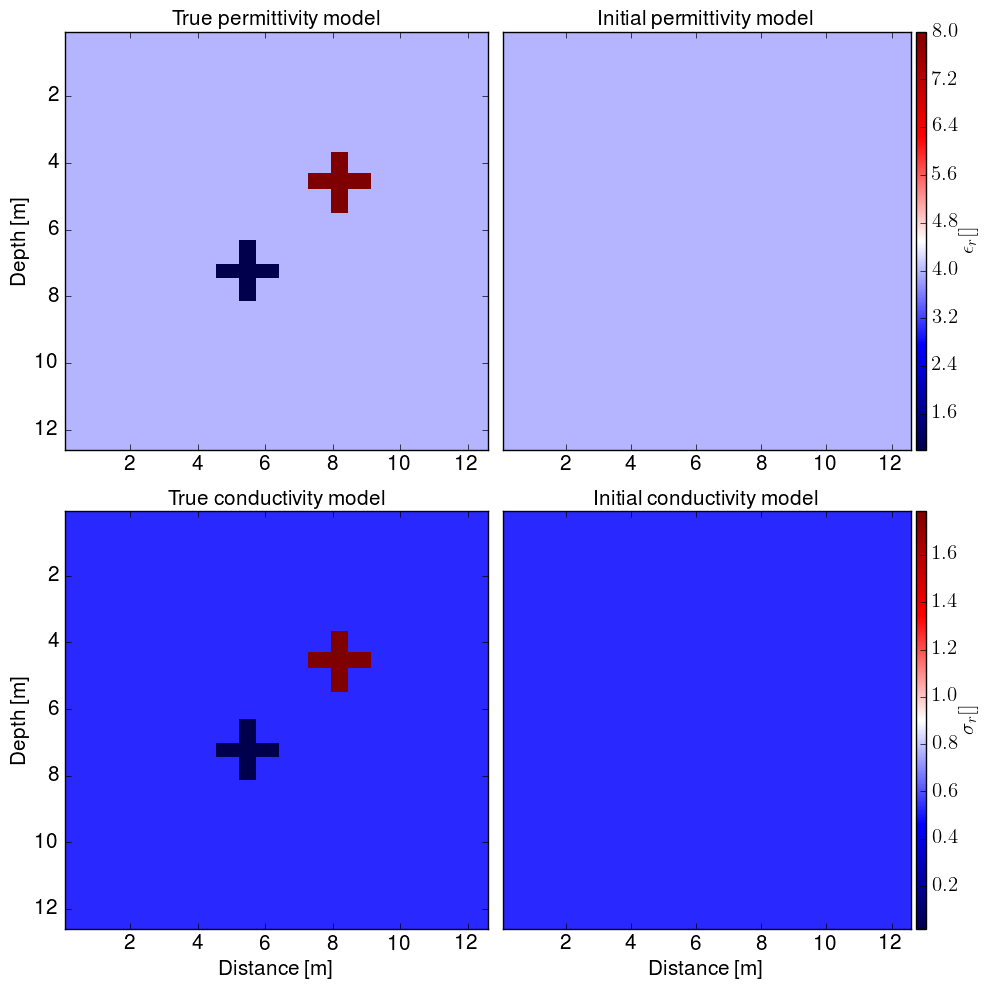

In [304]:
plt.close('all')
plt.figure()
do_plot(1, eps,'', r"True permittivity model",np.min(eps),np.max(eps), r"$\epsilon_r []$")
do_plot(2, eps_init,'', r"Initial permittivity model",np.min(eps),np.max(eps), r"$\epsilon_r []$")
do_plot(3, sig,'', r"True conductivity model",np.min(sig),np.max(sig), r"$\sigma_r []$")
do_plot(4, sig_init,'', r"Initial conductivity model",np.min(sig),np.max(sig), r"$\sigma_r []$")
plt.tight_layout()
#plt.savefig('test.png', format='png', dpi=100)
plt.savefig('test.pdf', bbox_inches='tight', format='pdf')
plt.show()